In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
for i in df.columns:
    print(df[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In cap shape 'c' have very low value=4,In cap-surface 'g' have low value=4,In cap-color ('r','u') have less value=16,In odor 'm' has low value=36,
In veil-color have low value=8,In stalk surface below ring 'y' has low value=8, In stalk-surface-above-ring 'y' has value=24

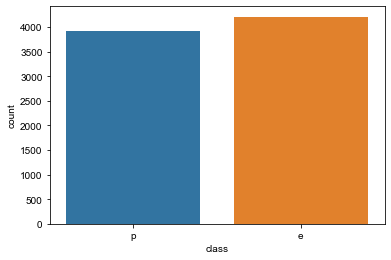

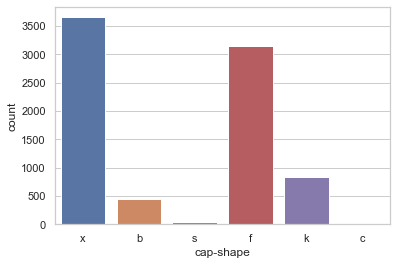

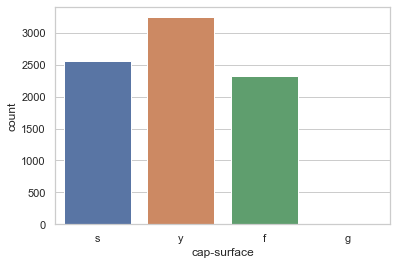

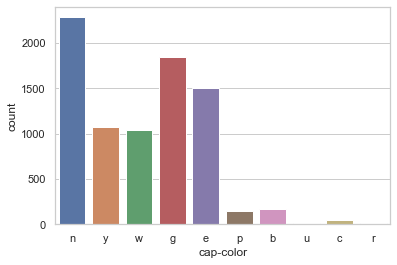

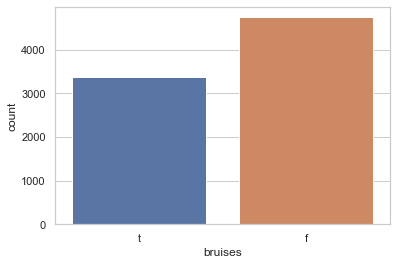

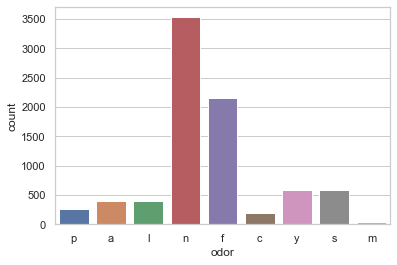

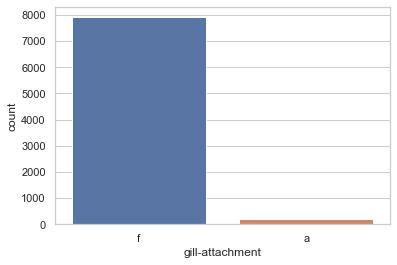

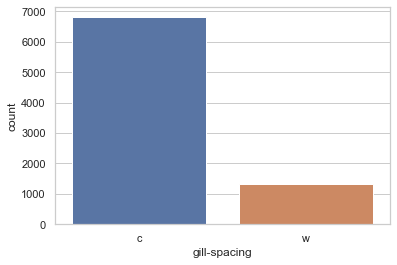

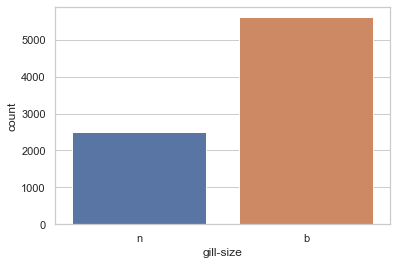

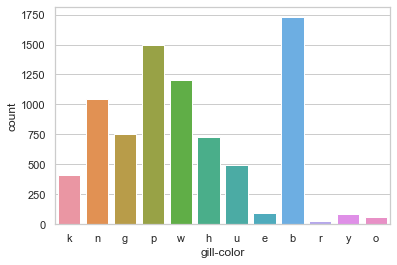

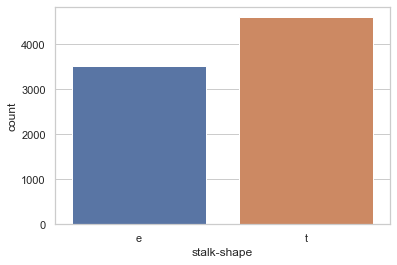

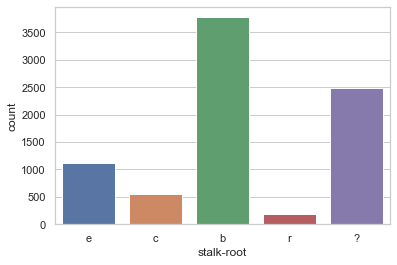

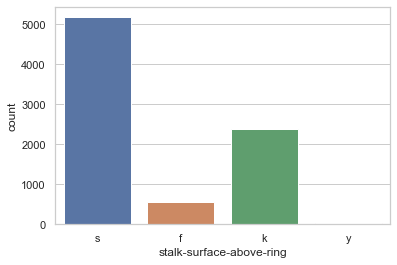

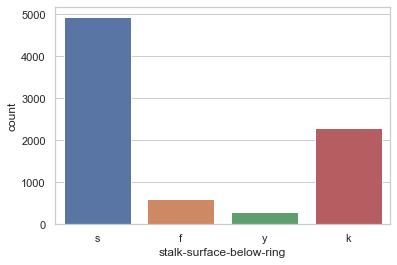

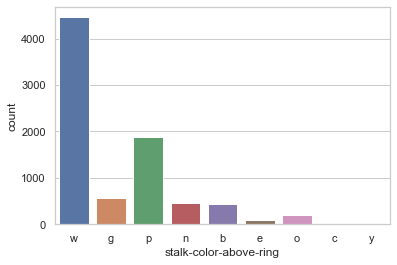

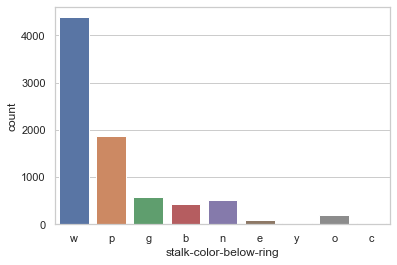

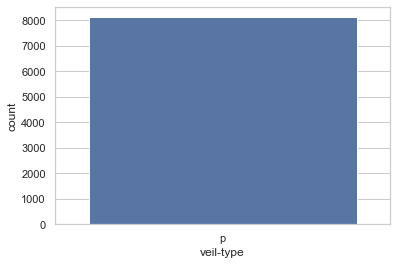

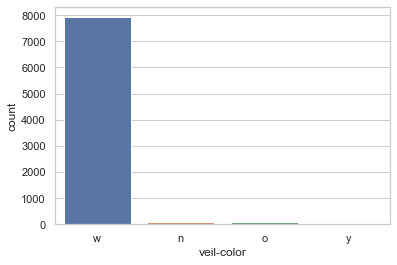

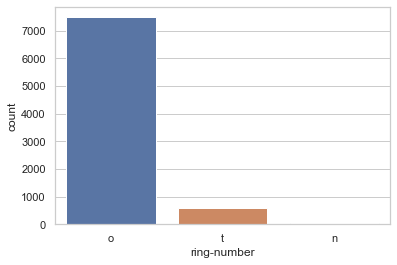

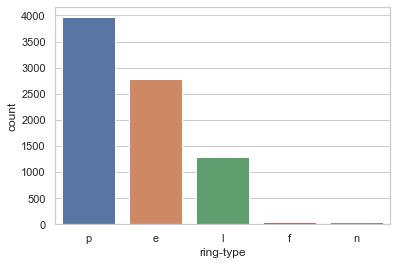

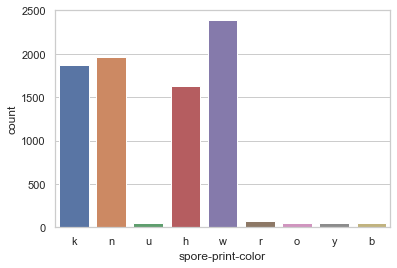

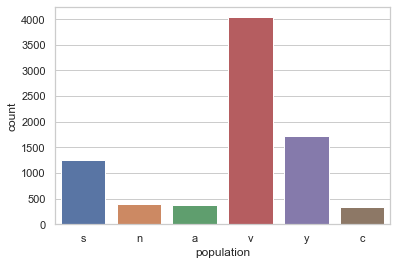

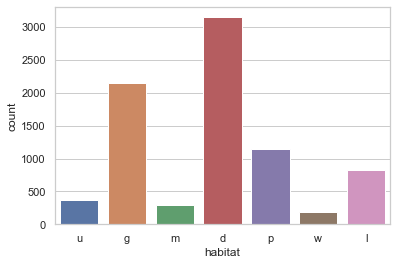

In [10]:
for i in df.columns:
    plt.figure()
    sns.countplot(df[i])
    sns.set(style='whitegrid')

from the count plot observation is in most of columns some classes have low value copare to another

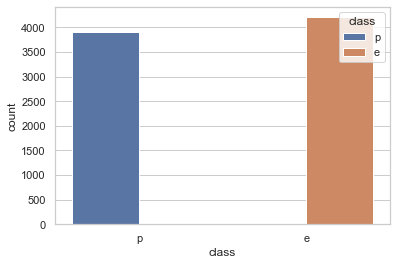

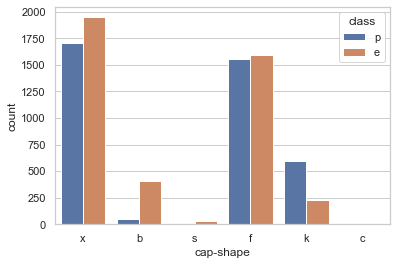

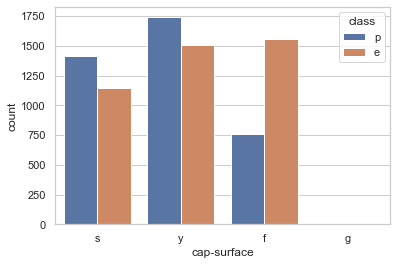

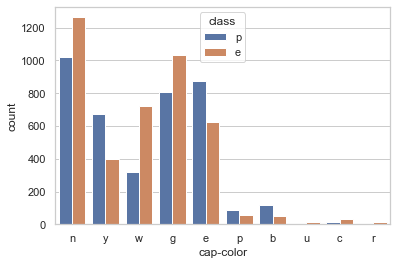

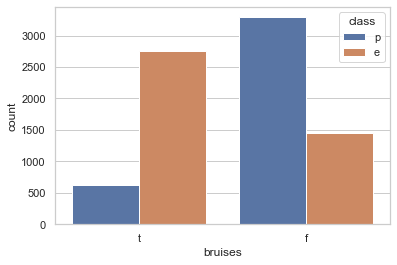

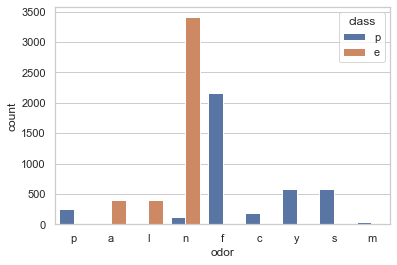

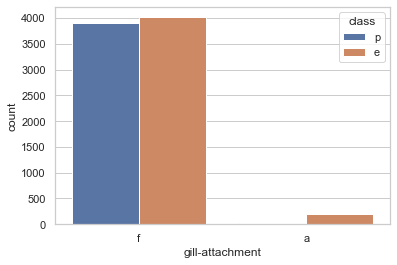

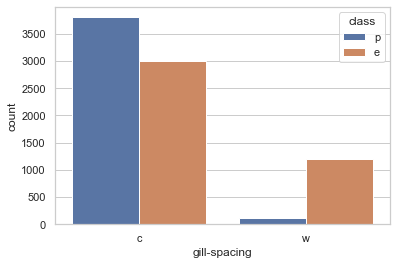

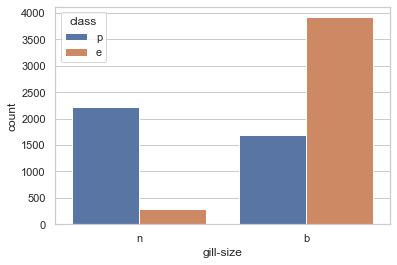

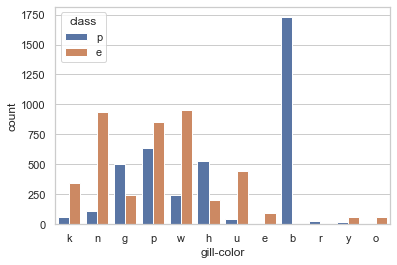

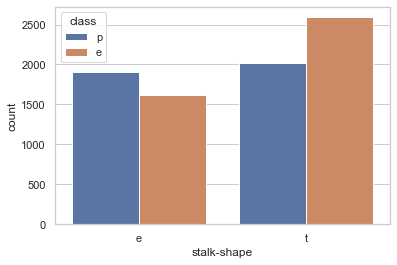

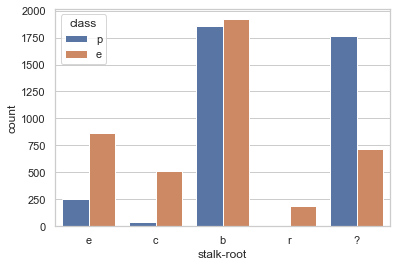

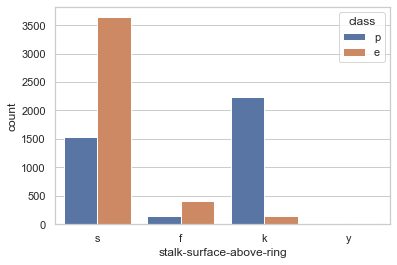

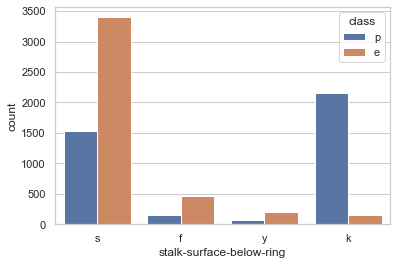

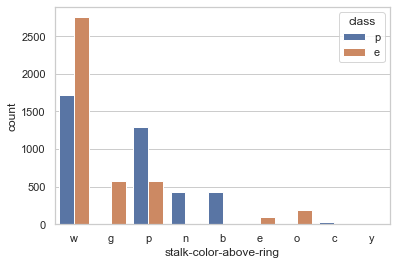

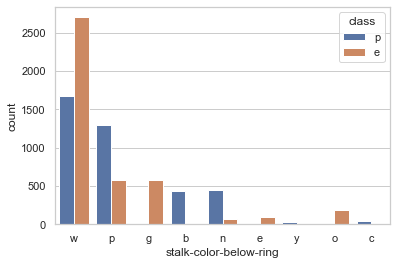

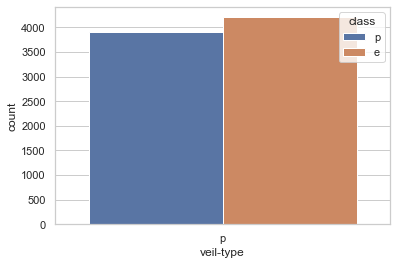

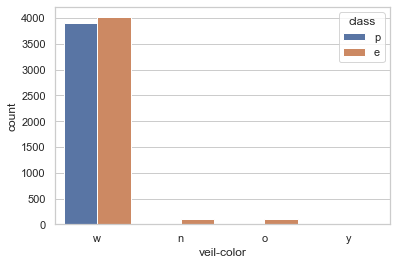

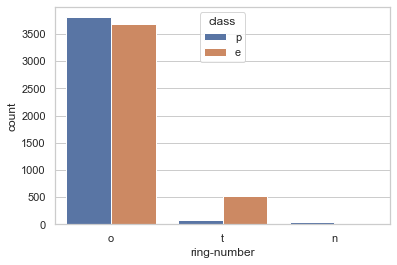

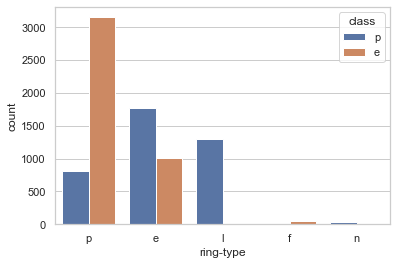

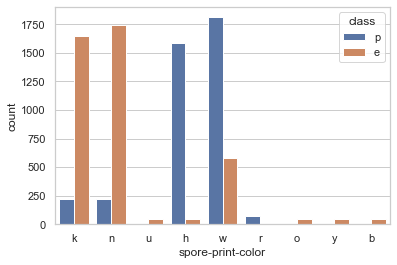

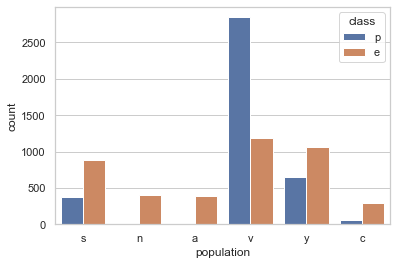

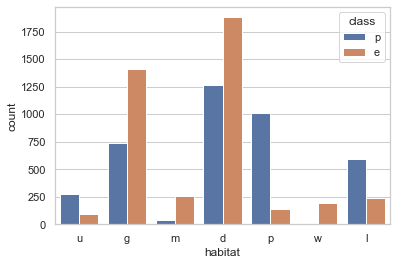

In [11]:
for i in df.columns:
    plt.figure()
    sns.countplot(df[i],hue='class',data=df)

From the above count plot most of feature like odor,gill attachment,stalk surface above/below ring,veil color,ring numbe,ring type have drop that columns by checking correlation b/t them

In [12]:
[pd.pivot_table(df, index=[col,"class"], aggfunc={col:np.count_nonzero}) for col in df[1:]]


[             class
 class class       
 e     e       4208
 p     p       3916,
                  cap-shape
 cap-shape class           
 b         e            404
           p             48
 c         p              4
 f         e           1596
           p           1556
 k         e            228
           p            600
 s         e             32
 x         e           1948
           p           1708,
                    cap-surface
 cap-surface class             
 f           e             1560
             p              760
 g           p                4
 s           e             1144
             p             1412
 y           e             1504
             p             1740,
                  cap-color
 cap-color class           
 b         e             48
           p            120
 c         e             32
           p             12
 e         e            624
           p            876
 g         e           1032
           p            808
 n         e 

most of mashroom from e class
both mashroom classes are from x and f shape
according to cap surface p-class mashroom is high in 'y' category and in e-class high in 'f' category
cap color both class mashroom lies b/t 'n to e' categoty
gil attachment 'a'category has less species as well same  in gill-spacing
stalk above/beloe ring 's' category has more 'e class' mashroom species
veil color 'w' category has high both species same in ring number 'o' category


In [13]:
lb=LabelEncoder()
for i in df.columns:
    df[i]=lb.fit_transform(df[i])

In [14]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [15]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

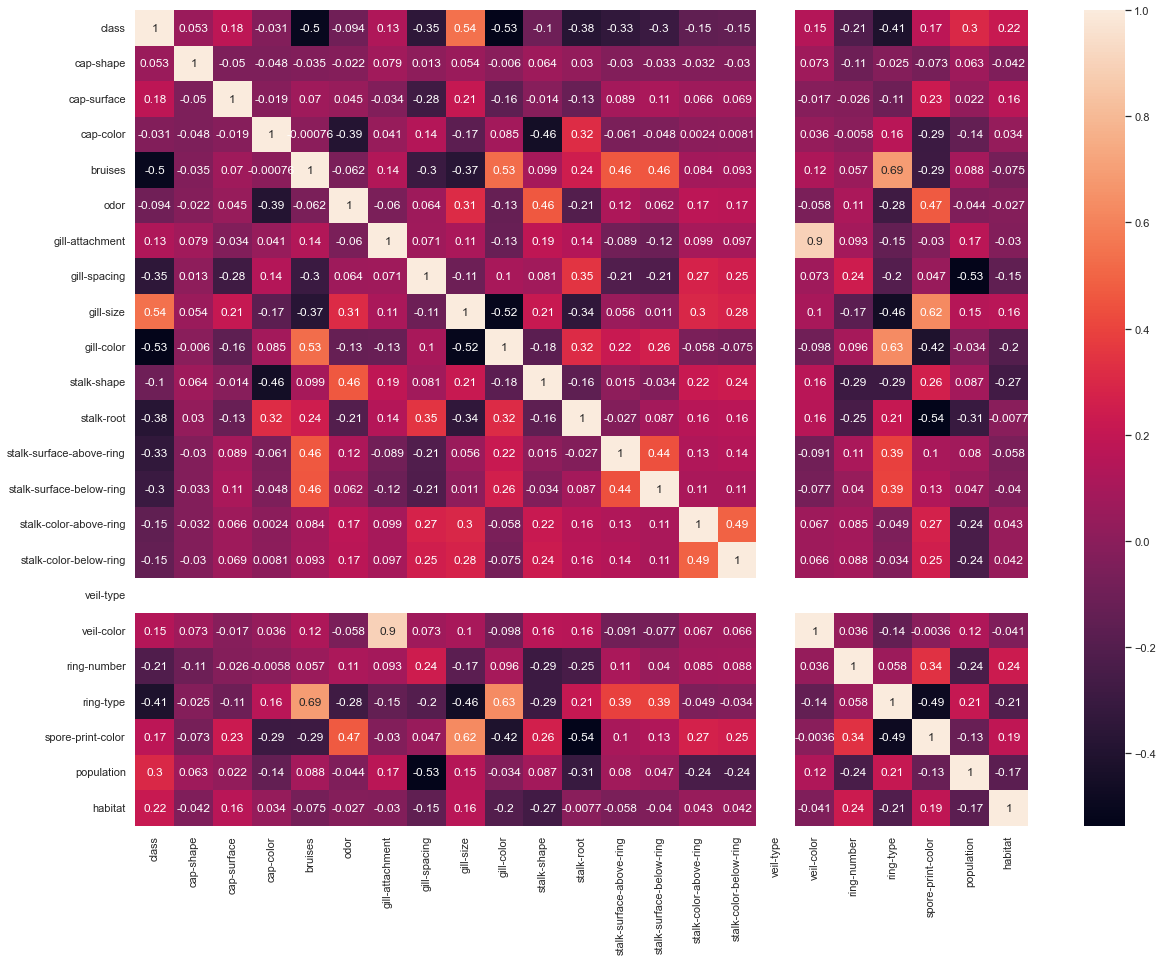

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)


In [17]:
df.corr()['class']

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
x=df.iloc[:,1:]
y=df.iloc[:,0]


# Check VIF score for each columns

In [20]:
def vifcal():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['column']=x.columns
    print(vif)


In [21]:
vifcal()

           vif                    column
0     5.463186                 cap-shape
1     3.904712               cap-surface
2     5.950600                 cap-color
3     7.984231                   bruises
4     8.918271                      odor
5   256.122838           gill-attachment
6     4.534113              gill-spacing
7     5.758180                 gill-size
8     6.284702                gill-color
9     9.243136               stalk-shape
10    8.129864                stalk-root
11   11.707764  stalk-surface-above-ring
12   11.768772  stalk-surface-below-ring
13   17.163156    stalk-color-above-ring
14   17.215182    stalk-color-below-ring
15         NaN                 veil-type
16  280.123888                veil-color
17   65.370463               ring-number
18   13.429124                 ring-type
19   16.937589         spore-print-color
20   21.434074                population
21    2.800932                   habitat


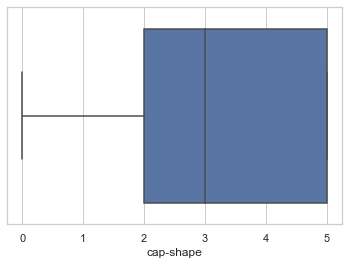

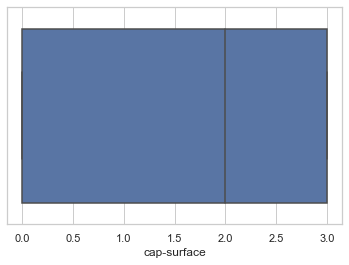

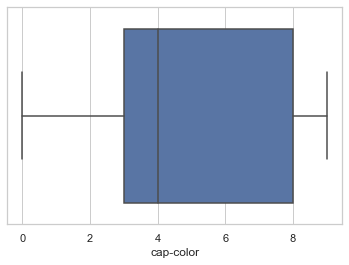

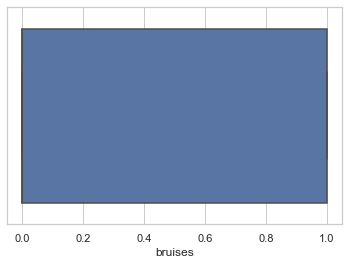

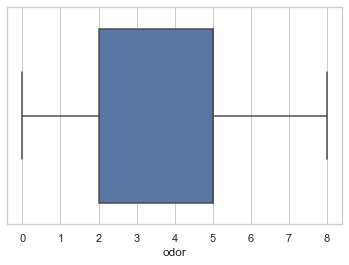

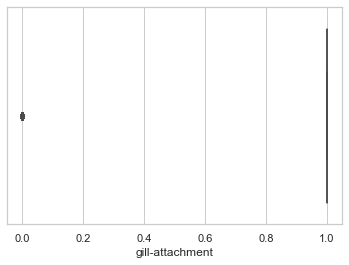

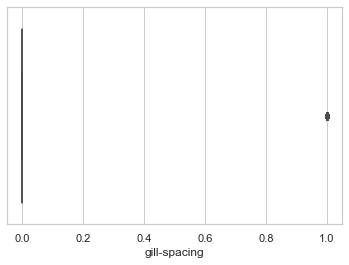

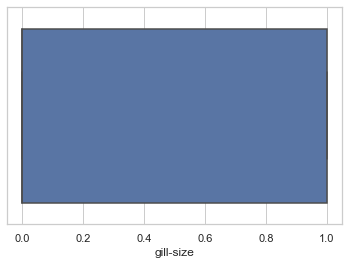

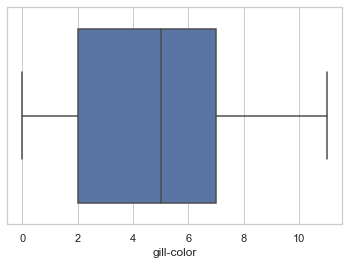

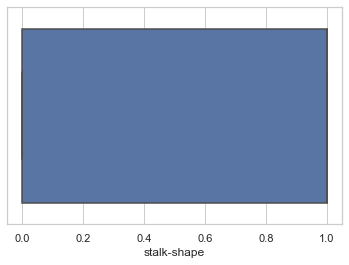

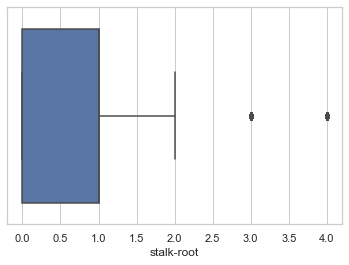

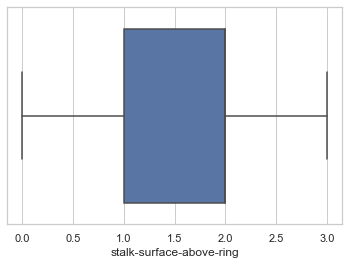

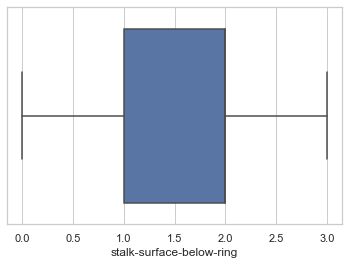

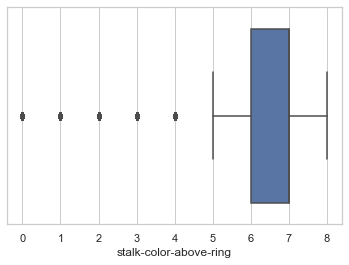

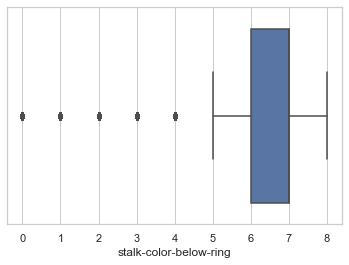

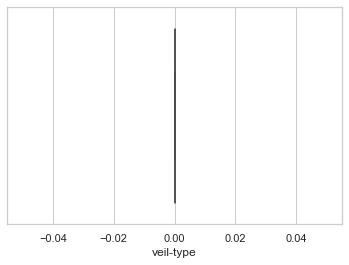

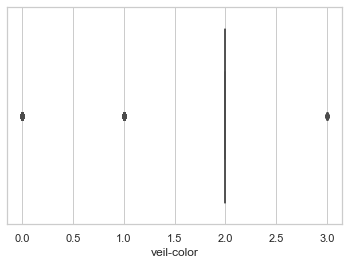

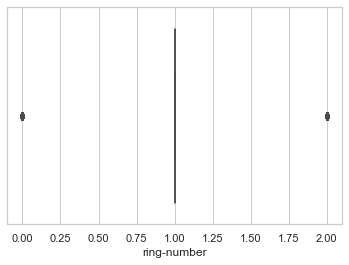

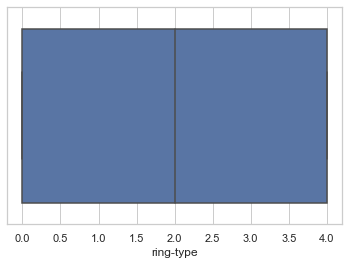

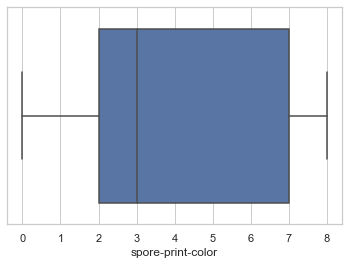

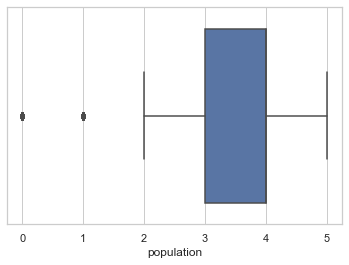

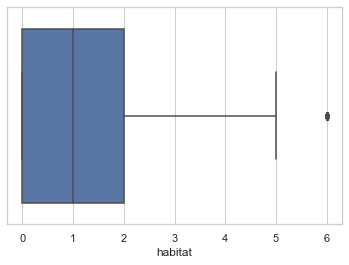

In [22]:
for i in x.columns:
    plt.figure()
    sns.boxplot(x[i])

from VIF values and more ouliers present in that we drop that columns

In [23]:
x=x.drop(['gill-attachment','veil-color','ring-number'],axis=1)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,0,3,2,2,7,7,0,4,2,3,5
1,5,2,9,1,0,0,0,4,0,2,2,2,7,7,0,4,3,2,1
2,0,2,8,1,3,0,0,5,0,2,2,2,7,7,0,4,3,2,3
3,5,3,8,1,6,0,1,5,0,3,2,2,7,7,0,4,2,3,5
4,5,2,3,0,5,1,0,4,1,3,2,2,7,7,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,11,0,0,2,2,5,5,0,4,0,1,2
8120,5,2,4,0,5,0,0,11,0,0,2,2,5,5,0,4,0,4,2
8121,2,2,4,0,5,0,0,5,0,0,2,2,5,5,0,4,0,1,2
8122,3,3,4,0,8,0,1,0,1,0,2,1,7,7,0,0,7,4,2


In [24]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR =Q3-Q1

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
x = x[~((x < (Q1-1.5*IQR)) | (x > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
x.shape

(3800, 19)

In [25]:
((8124-5944)/8124)*100


26.834071885770555

# 26% data must loss so not removing outliers for categorical columns

# Use smote for unbalace dataset and cleaning

In [26]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
x1=df.iloc[:,1:]
x1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


from the correlation with the target column bruises and gill color highly negatively correlated so we drop  that column with ref of +/-0.5 corr

from the vif score gill-attachment and veil-color have high colinearity 256 & 280 as well from correlation both score is 0.13 & 0.15 so we drop gill-attachment column

In [29]:
x1=x1.drop(['bruises','gill-color','gill-attachment'],axis=1)

In [30]:
y1=df.iloc[:,0]

# use smote for balancing dataset

In [31]:
sm=SMOTE()
x1,y1=sm.fit_resample(x1,y1)

In [32]:
np.bincount(y1)

array([4208, 4208], dtype=int64)

In [33]:
y1.value_counts()

1    4208
0    4208
Name: class, dtype: int64

In [34]:
x1

,cap-shape,cap-surface,cap-color,odor,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,6,0,1,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,0,0,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,3,0,0,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,6,0,1,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,5,1,0,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,5,3,3,2,0,0,0,1,1,1,4,0,0,2,1,2,1,5,4
8412,2,2,4,8,0,1,1,0,1,1,7,6,0,2,1,0,7,4,2
8413,5,3,4,7,0,1,1,0,1,1,7,6,0,2,1,0,7,4,0
8414,2,3,4,2,0,1,1,0,2,1,7,7,0,2,1,0,7,4,0


In [35]:
y1

0       1
1       0
2       0
3       1
4       0
       ..
8411    1
8412    1
8413    1
8414    1
8415    1
Name: class, Length: 8416, dtype: int32

# apply scaler

In [36]:
sc=StandardScaler()
sc.fit_transform(x1)

array([[ 1.03292775,  0.13305313, -0.19689086, ..., -0.67614383,
        -0.5286208 ,  2.02462521],
       [ 1.03292775,  0.13305313,  1.76502426, ..., -0.26026818,
        -1.33735969, -0.30059938],
       [-2.09611981,  0.13305313,  1.37264123, ..., -0.26026818,
        -1.33735969,  0.86201292],
       ...,
       [ 1.03292775,  0.94921577, -0.19689086, ...,  1.40323441,
         0.28011809, -0.88190552],
       [-0.84450078,  0.94921577, -0.19689086, ...,  1.40323441,
         0.28011809, -0.88190552],
       [-0.84450078,  0.13305313, -0.98165691, ...,  1.40323441,
         0.28011809,  0.28070677]])

In [37]:
from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()

# selection of ramdom State

In [38]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    lg.fit(x_train,y_train)
    pred_tr=lg.predict(x_train)
    pred_te=lg.predict(x_test)
    if round(f1_score(y_train,pred_tr)*100,1)==round(f1_score(y_test,pred_te)*100,1):
        print('\n Random State',i)
        print('f1_score TR',f1_score(y_train,pred_tr)*100)
        print('f1_score TE',f1_score(y_test,pred_te)*100)
    


 Random State 6
f1_score TR 95.16977522716404
f1_score TE 95.17958412098298

 Random State 15
f1_score TR 95.4696132596685
f1_score TE 95.53831231813773

 Random State 19
f1_score TR 95.87039390088945
f1_score TE 95.93572778827978

 Random State 27
f1_score TR 95.3924372418176
f1_score TE 95.36992840095466

 Random State 35
f1_score TR 95.35984848484848
f1_score TE 95.41910331384015

 Random State 38
f1_score TR 95.40137798429738
f1_score TE 95.3673373888629

 Random State 45
f1_score TR 95.68390986988258
f1_score TE 95.71428571428572


from that we select ramdom state value 45 for best score

In [39]:
m1=LogisticRegression()
pr1={'penalty':['l1','l2','elasticnet','none'],'C':[0.1,0.01,1],'fit_intercept':[True,False],'class_weight':['dict','balance','none'],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'multi_class':['auto','ovr','multinomial']}

# Use hyperparameter tuning for best score

In [40]:
grid=GridSearchCV(estimator=m1,param_grid=pr1)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

score:  0.966094612856718
Best param:  {'C': 0.1, 'class_weight': 'dict', 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In [41]:
lg=LogisticRegression(C=0.1,class_weight='dict',fit_intercept=True,multi_class='auto',penalty='none',solver='newton-cg')

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=45)
lg.fit(x_train,y_train)
predict=lg.predict(x_test)
print('Train score:',lg.score(x_train,y_train)*100)
print('f1 Score: ',f1_score(y_test,predict)*100)
print('accuracy score',accuracy_score(y_test,predict)*100)
print('Confusion matrix \n',confusion_matrix(y_test,predict))
print('Classification report \n',classification_report(y_test,predict))

Train score: 97.46514575411915
f1 Score:  97.14828897338403
accuracy score 97.14828897338404
Confusion matrix 
 [[1022   34]
 [  26 1022]]
Classification report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1056
           1       0.97      0.98      0.97      1048

    accuracy                           0.97      2104
   macro avg       0.97      0.97      0.97      2104
weighted avg       0.97      0.97      0.97      2104



# Apply other Classifications

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [44]:
p2={'criterion':['gini','entropy'],'class_weight':['dict','list of dict','balanced'],'max_features':['auto','sqrt','log2']}
m2=DecisionTreeClassifier()
grid=GridSearchCV(estimator=m2,param_grid=p2)
grid.fit(x_train,y_train)
print(m2)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

DecisionTreeClassifier()
score:  1.0
Best param:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto'}


In [45]:
p3={'kernel':['linear','poly','rbf'],'gamma':['auto','scale'],'probability':[True,False],'decision_function_shape':['ovo','ovr']}
m3=SVC()
grid=GridSearchCV(estimator=m3,param_grid=p3)
grid.fit(x_train,y_train)
print(m3)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

SVC()
score:  1.0
Best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'poly', 'probability': True}


In [46]:
p4={'n_neighbors':[5,7,11,13],'weights':['uinofrm','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
m4=KNeighborsClassifier()
grid=GridSearchCV(estimator=m4,param_grid=p4)
grid.fit(x_train,y_train)
print(m4)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

KNeighborsClassifier()
score:  0.9993664620121889
Best param:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [47]:
p5={'penalty':['l1','l2','elasticnet'],'alpha':[1,0.1,0.01,0.001,0.0001],'fit_intercept':[True,False]}
m5=SGDClassifier()
grid=GridSearchCV(estimator=m5,param_grid=p5)
grid.fit(x_train,y_train)
print(m5)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

SGDClassifier()
score:  0.9759175258766828
Best param:  {'alpha': 0.001, 'fit_intercept': True, 'penalty': 'l1'}


In [48]:
dtc=DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_features='auto')
svc=SVC(decision_function_shape='ovo',gamma='auto',kernel='poly',probability=True)
kn=KNeighborsClassifier(algorithm='ball_tree',n_neighbors= 5,weights='distance')
sgd=SGDClassifier(alpha=0.001,fit_intercept=False, penalty='l1')

In [49]:
def classifiers(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('Accuracy score:\n',accuracy_score(y_test,pred)*100)
    print('F1 score:\n',f1_score(y_test,pred)*100)
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    
    

In [50]:
classifiers(dtc)

DecisionTreeClassifier(class_weight='balanced', max_features='auto') 
 100.0
Accuracy score:
 100.0
F1 score:
 100.0
Confusion matrix:
 [[1056    0]
 [   0 1048]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00      1048

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104



In [51]:
classifiers(svc)

SVC(decision_function_shape='ovo', gamma='auto', kernel='poly',
    probability=True) 
 100.0
Accuracy score:
 100.0
F1 score:
 100.0
Confusion matrix:
 [[1056    0]
 [   0 1048]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00      1048

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104



In [52]:
classifiers(kn)

KNeighborsClassifier(algorithm='ball_tree', weights='distance') 
 100.0
Accuracy score:
 99.90494296577947
F1 score:
 99.90448901623687
Confusion matrix:
 [[1056    0]
 [   2 1046]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00      1048

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104



In [53]:
classifiers(sgd)

SGDClassifier(alpha=0.001, fit_intercept=False, penalty='l1') 
 98.03548795944234
Accuracy score:
 97.71863117870723
F1 score:
 97.7294228949858
Confusion matrix:
 [[1023   33]
 [  15 1033]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1056
           1       0.97      0.99      0.98      1048

    accuracy                           0.98      2104
   macro avg       0.98      0.98      0.98      2104
weighted avg       0.98      0.98      0.98      2104



# ensemble method

In [54]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [55]:
pr2={'criterion':['gini','entropy']}
md1=RandomForestClassifier()
md2=AdaBoostClassifier()
pr4={'loss':['deviance','exponential'],'criterion':['friedman_mse','mse','mae']}
md4=GradientBoostingClassifier()

In [56]:
grid=GridSearchCV(estimator=md1,param_grid=pr2)
grid.fit(x_train,y_train)
print(md1)
print('score: ',grid.best_score_)
print('Best param: ',grid.best_params_)

RandomForestClassifier()
score:  1.0
Best param:  {'criterion': 'gini'}


In [57]:
ensemble=[RandomForestClassifier(criterion='gini'),AdaBoostClassifier(),GradientBoostingClassifier()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n\n score: \n',i.score(x_train,y_train))
    pred=i.predict(x_test)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:\n',accuracy_score(y_test,pred)*100)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

RandomForestClassifier() 

 score: 
 1.0
 F1 score: 100.0
Accuracy scoer:
 100.0
Confusion_matrix:
 [[1056    0]
 [   0 1048]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00      1048

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104



AdaBoostClassifier() 

 score: 
 1.0
 F1 score: 100.0
Accuracy scoer:
 100.0
Confusion_matrix:
 [[1056    0]
 [   0 1048]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00      1048

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104



GradientBoostingClassifier() 

 score: 
 1.0

# Cross validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
for i in range(2,10):
    crs_score=cross_val_score(DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_features='auto'),x_train,y_train,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',f1_score(y_test,pred)*100)

cv value: 2
cross value score: 100.0
actual score: 100.0
cv value: 3
cross value score: 99.90494296577947
actual score: 100.0
cv value: 4
cross value score: 100.0
actual score: 100.0
cv value: 5
cross value score: 99.93665874901029
actual score: 100.0
cv value: 6
cross value score: 100.0
actual score: 100.0
cv value: 7
cross value score: 100.0
actual score: 100.0
cv value: 8
cross value score: 100.0
actual score: 100.0
cv value: 9
cross value score: 100.0
actual score: 100.0


In [60]:
score2=cross_val_score(dtc,x_train,y_train,cv=3)
print(score2.mean())

1.0


In [61]:
from sklearn.metrics import roc_curve

In [62]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)
print('ROC score:',roc_auc_score(y_test,y_pred_prob))

ROC score: 1.0


Text(0.5, 1.0, 'AUV ROC CURVE DTC')

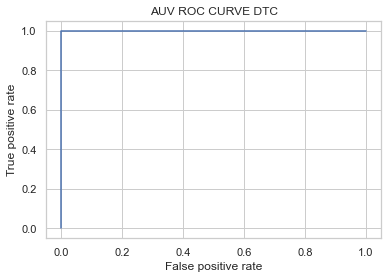

In [63]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUV ROC CURVE DTC')

# Saving model

In [64]:
import joblib
joblib.dump(dtc,'mashroomdtc.obj')
mashroomdtc=joblib.load('mashroomdtc.obj')
pd.DataFrame({'Actual':y_test,'Prediction':pred})

,Actual,Prediction
4501,1,1
563,0,0
7701,0,0
7354,0,0
647,0,0
...,...,...
3509,0,0
4184,1,1
2111,0,0
3363,1,1
